# **ERIC HERDIAN - UNIVERSITAS BINA NUSANTARA**

**USING LOGISTIC REGRESSION**

In [1]:
# Install Package
!pip install ucimlrepo

In [2]:
# Import Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from ucimlrepo import fetch_ucirepo
%matplotlib inline

In [3]:
# Import & Load Data
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

x = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

In [4]:
x

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [5]:
y

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,0,0,0,0,0,0
9997,0,0,0,0,0,0
9998,0,0,0,0,0,0


In [6]:
# Do Changes on data so that it can be process
# Target: 'Machine Failure'
x_data = pd.get_dummies(x, columns=['Type'], drop_first=True)
y_data = y['Machine failure'].values.reshape(-1)

# print(x_data)
# print(y_data)

In [7]:
# Make a Model Logistic Regression
data_model = LogisticRegression()

In [8]:
# Processing data into model using machine learning Logistic Regression
# Purpose: Predict tool wear failures in a milling machine based on sensor data
data_model.fit( x_data, y_data )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Making prediction
twf_pred = data_model.predict(x_data)
print(twf_pred)

[0 0 0 ... 0 0 0]


In [10]:
# Prediction in table
data_pred = x.copy()
data_pred['TWF Prediction'] = twf_pred
data_pred

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF Prediction
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [11]:
# Checking accuracy and F1 score of the model prediction
model_acc = metrics.accuracy_score( y_data , twf_pred )
model_f1_score = metrics.f1_score( y_data , twf_pred )
print("Accuracy: ", model_acc)
print("F1 Score: ", model_f1_score)

Accuracy:  0.9703
F1 Score:  0.31408775981524245


Coefficient of Logistic Regression Model:  [[ 0.8161711  -0.9031566   0.0114036   0.27775827  0.01314964  0.33852793
  -0.07911712]]


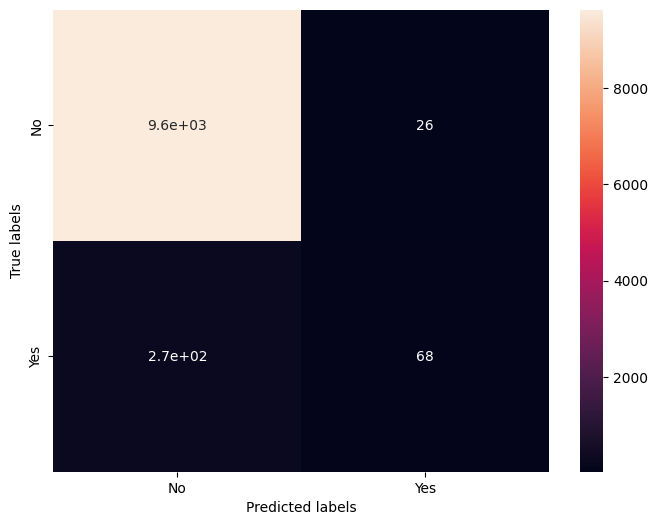

In [12]:
# Plot confusion matrix
plt.figure(figsize=(8,6))

cm = confusion_matrix(y_data, twf_pred, labels=[0,1])
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

print( "Coefficient of Logistic Regression Model: ", data_model.coef_ )

In [13]:
# Create dataframe for feature importance of logistic regression
dict_importance_features = { "Importance_Feature" : abs( data_model.coef_[0]) }
importance_features_dataframe = pd.DataFrame( dict_importance_features )
importance_features_dataframe.index = x_data.columns
importance_features_dataframe

,Importance_Feature
Air temperature,0.816171
Process temperature,0.903157
Rotational speed,0.011404
Torque,0.277758
Tool wear,0.013150
Type_L,0.338528
Type_M,0.079117


<Axes: >

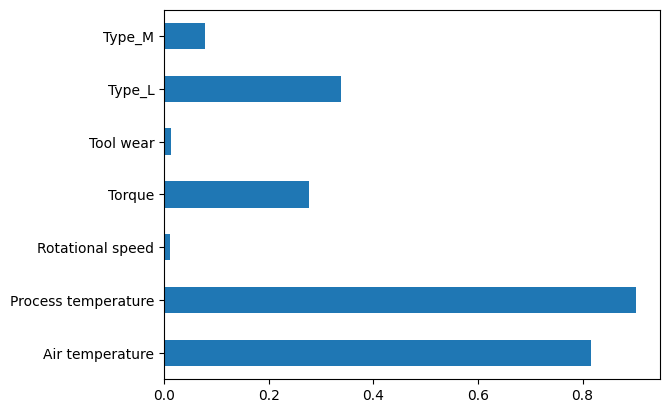

In [14]:
# Plot of feature importance
importance_features_dataframe[ "Importance_Feature" ].plot( kind="barh" )